<a href="https://colab.research.google.com/github/PhanTruong-Thinh/Data-Augmentation/blob/main/cnn_flower_image_classification_data_augmentations_CIFAR10_RandomZoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h3 style='color:purple'>Train test split</h3>

In [2]:
from sklearn.model_selection import train_test_split
from keras import Sequential, datasets, Model, layers
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


<h3 style='color:purple'>Preprocessing: scale images</h3>

In [3]:
X_train_scaled = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255
X_test_scaled = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [ ]:

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 15s 6ms/step - loss: 2.4344 - accuracy: 0.4188
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0397 - accuracy: 0.5500
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7574 - accuracy: 0.6003
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4258 - accuracy: 0.6451
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3494 - accuracy: 0.6680
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2927 - accuracy: 0.6806
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2488 - accuracy: 0.6951
Epoch 8/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2152 - accuracy: 0.7043
Epoch 9/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1777 - accuracy: 0.7164
Epoch 10/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.15

In [ ]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6110 - accuracy: 0.6685


[1.6110252141952515, 0.6685000061988831]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

313/313 [==============================] - 1s 2ms/step


array([[ 0.78056073,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [20.9949    , 19.850567  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.488945  ,  7.854713  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.482627  , 13.694426  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [4]:
data_augmentation = keras.Sequential(
  [

    # layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    # layers.experimental.preprocessing.RandomContrast(factor=0.2),
    # layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),

  ]
)

**Original Image**

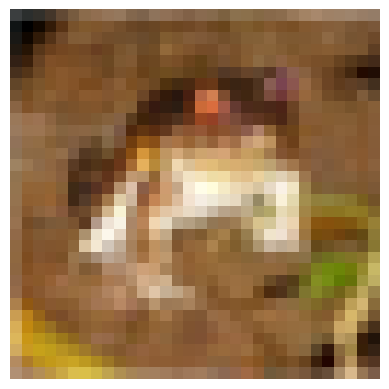

In [5]:
plt.axis('off')
plt.imshow(X_train[0])

**Newly generated training sample using data augmentation**

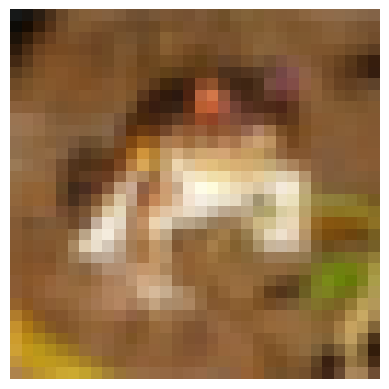

In [6]:
plt.axis('off')
plt.imshow(data_augmentation(X_train)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [7]:

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 14s 5ms/step - loss: 2.5916 - accuracy: 0.3664
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2677 - accuracy: 0.4777
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1263 - accuracy: 0.5230
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0271 - accuracy: 0.5533
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9632 - accuracy: 0.5709
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9143 - accuracy: 0.5829
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6794 - accuracy: 0.6162
Epoch 8/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4000 - accuracy: 0.6556
Epoch 9/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3665 - accuracy: 0.6642
Epoch 10/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.33

In [8]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2383 - accuracy: 0.7143


[1.2382744550704956, 0.7142999768257141]